In [125]:
import numpy as np
import matplotlib.pyplot as plt


In [126]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

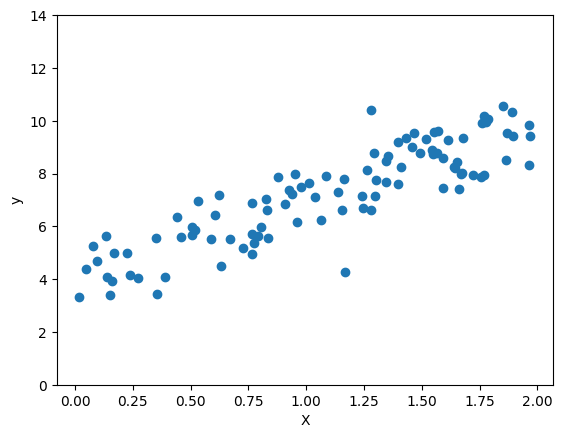

In [127]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y', rotation=90)
plt.ylim(ymin=0, ymax=14)
plt.show()

In [128]:
## Now we need to find the best theta value by using the Normal Equation

In [129]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Normal Equation
theta_best

array([[4.02994709],
       [2.91443227]])

In [130]:
## After that we can start making some predictions

In [131]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.02994709],
       [9.85881164]])

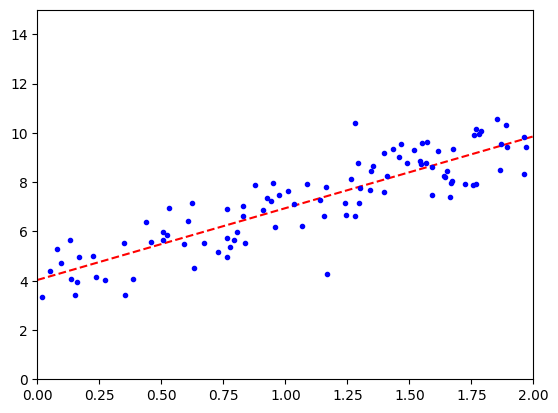

In [132]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [133]:
## This performed well, lets compare are model with Scikit-Learn

In [134]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02994709]), array([[2.91443227]]))

In [135]:
lin_reg.predict(X_new)

array([[4.02994709],
       [9.85881164]])

In [136]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.02994709],
       [2.91443227]])

In [137]:
## As we can see, our algorithm performed roughly the same as Scikit-Learn, lets now use Gradient Descent to optimize these results

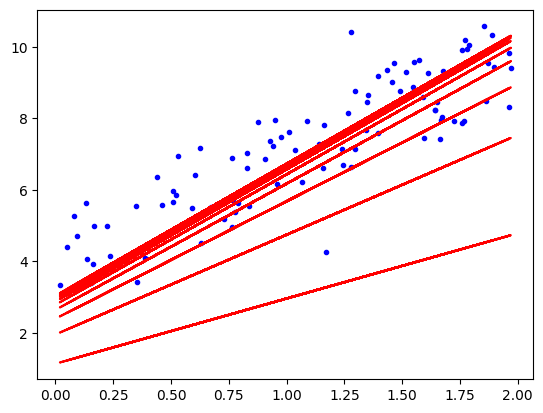

array([[4.02994709],
       [2.91443227]])

In [138]:
eta = 0.1 # learning rate, we can use GridSearch for some more complex problems
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
plt.plot(X, y, 'b.')
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient vector of the cost function
    theta = theta -eta*gradients # Gradient Descent step
    if iteration < 10:
        y_predict = X_b.dot(theta)
        plt.plot(X, y_predict, 'r-')
plt.show()
theta

In [139]:
## Lastly, lets check how Stochastic Gradient Descent handles this task

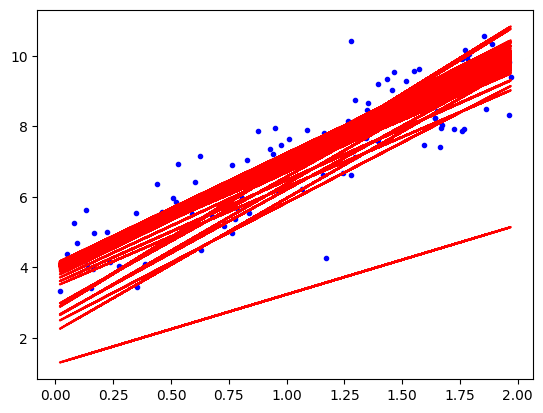

In [140]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2 ,1)
plt.plot(X, y, 'b.')
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        
        if i < 8:
            y_predict = X_b.dot(theta)
            plt.plot(X, y_predict, 'r-')
plt.show()

In [141]:
theta

array([[3.99877272],
       [2.91899134]])

In [142]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.95998103]), array([2.92097779]))